In [1]:
import astropy
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import h5py
import scipy as sp
import astropy.units as u
import astropy.coordinates as coord
from astropy.coordinates import Galactocentric as gc
import pycbc
from pycbc.waveform import get_fd_waveform as fd
from pycbc.psd.analytical_space import *



In [2]:
ps = h5py.File('param_samples.hdf', 'r')
sls = h5py.File('sky_loc.hdf', 'r')
print(ps.keys(), sls.keys())

<KeysViewHDF5 ['coa_phase', 'inclination', 'm1', 'm2', 'polarization']> <KeysViewHDF5 ['dec', 'distance', 'ra']>


In [3]:
coa_phase = np.array(ps['coa_phase'])
inclination = np.array(ps['inclination'])
polarization = np.array(ps['polarization'])
m1 = np.array(ps['m1'])
m2 = np.array(ps['m2'])
ra = np.array(sls['ra'])
dec = np.array(sls['dec'])
dist = np.array(sls['distance'])/1000  # divide by 1000 to convert to Mpc

In [4]:
flow = 0.0001
delta_f = 1.0 / (3600*24*31)
fs = 2
flen = int(fs/delta_f)//2 + 1

In [5]:
sh_lisa = sensitivity_curve_lisa_SciRD(flen, delta_f, flow)

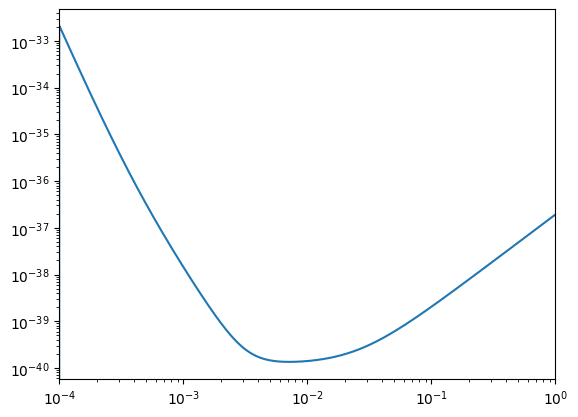

In [17]:
plt.loglog(sh_lisa.sample_frequencies, sh_lisa)
plt.xlim(0.0001, 1)
plt.savefig('lisa_sh.png', dpi = 300)

In [7]:
print(sh_lisa.sample_frequencies[-1])

1.0


In [10]:
snr = []
for i in range(len(m1)):   
    hp, hc = fd(approximant = 'TaylorF2',
                mass1 = m1[i],
                mass2 = m2[i],
                distance = dist[i], 
                coa_phase = coa_phase[i],
                inclination = inclination[i],
                delta_f = delta_f,
                f_lower = flow,
                f_final = 0.1)
    sigma_p_sq = pycbc.filter.matchedfilter.sigmasq(hp,
                                                    psd=sh_lisa,
                                                    low_frequency_cutoff=flow,
                                                    high_frequency_cutoff=0.1)
    sigma_c_sq = pycbc.filter.matchedfilter.sigmasq(hc,
                                                    psd=sh_lisa,
                                                    low_frequency_cutoff=flow,
                                                    high_frequency_cutoff=0.1)
    sigma_sq = sigma_p_sq + sigma_c_sq
    snr.append(np.sqrt(sigma_sq))

In [11]:
print(snr)

[51527.414324872894, 48502.25118085259, 196341.07577858018, 79017.23110313516, 113679.50870604561, 92495.6951271002, 71301.29691597765, 106615.86017015702, 73833.43403086011, 104319.19084238131, 88459.61659752006, 33388.760579322676, 48236.92078638409, 29613.24546854673, 68174.54465000743, 33502.34173857337, 37533.459459384496, 235374.81400233976, 38239.762219651675, 92965.64885611628, 53233.61089002317, 47905.33323804328, 48851.904094788966, 81677.25849560555, 35667.805195433044, 96061.84679869135, 27202.21618971062, 89616.99200192738, 92680.93133420045, 41508.36378896172, 21115.258066302154, 62189.71208957274, 70765.54206361291, 158721.3140159333, 22463.317968902127, 105620.28153537703, 55890.90513531883, 73023.17895870107, 54772.06657276842, 87864.48492440155, 234897.7990016323, 118936.68362378435, 98406.19291549234, 50613.77838233156, 42596.82619281353, 96704.49343172584, 43789.00618045357, 46250.48037027632, 60019.14660172806, 103662.93128386117, 46805.63477816368, 265376.76208322

Text(0, 0.5, '$log_{10}\\sqrt{\\langle \\tilde{h} | \\tilde{h} \\rangle}$')

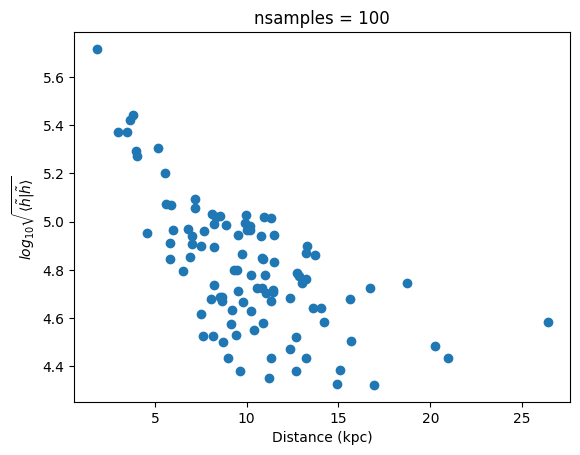

In [20]:
plt.scatter(dist*1000, np.log10(snr))
plt.title('nsamples = 100')
plt.xlabel(r'Distance (kpc)')
plt.ylabel(r'$log_{10}\sqrt{\langle \tilde{h} | \tilde{h} \rangle}$')
#plt.yscale('log')
#plt.savefig('snr_distance.png', dpi = 300)